In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from forex_python.converter import CurrencyRates

In [13]:
portfolio = ['ECOPETROL.CL', 'GEB.CL', 'PFCIBEST.CL', 'CIBEST.CL', 'GOOGL', 'AAPL', 'BVC.CL', 'NKE','IVV']

In [14]:
stock_prices = pd.DataFrame()
stock_returns = pd.DataFrame()

today_date = datetime.now()
end = today_date.strftime('%Y-%m-%d')

for x in portfolio:
    stock = yf.Ticker(x)
    close_price = stock.history(start='2021-01-01', end=end)['Close']

    stock_prices = pd.concat([stock_prices, close_price], axis=1)

    stock_returns = pd.concat([stock_returns, close_price.pct_change()], axis=1)

stock_prices.columns = portfolio
stock_returns.columns = portfolio

stock_prices = stock_prices.dropna()
stock_returns = stock_returns.dropna()

In [15]:
stock_prices.head()

,ECOPETROL.CL,GEB.CL,PFCIBEST.CL,CIBEST.CL,GOOGL,AAPL,BVC.CL,NKE,IVV
2021-01-04 00:00:00-05:00,1157.895752,1699.219604,21898.802734,22459.769531,85.659294,125.974487,7506.621582,130.465302,344.727875
2021-01-05 00:00:00-05:00,1183.718506,1715.099976,21905.251953,23914.626953,86.350067,127.531982,7557.257324,131.517609,347.009125
2021-01-06 00:00:00-05:00,1191.981689,1708.747803,22001.888672,22862.037109,85.497993,123.239059,7557.257324,132.560577,349.104156
2021-01-07 00:00:00-05:00,1225.551392,1626.803955,22240.271484,23002.828125,88.051712,127.444397,7772.456055,134.981766,354.271973
2021-01-08 00:00:00-05:00,1238.979248,1628.074463,22401.337891,23532.478516,89.217400,128.544373,8038.287598,136.285522,356.292603


Text(0.5, 1.0, 'Stock Prices Over Time')

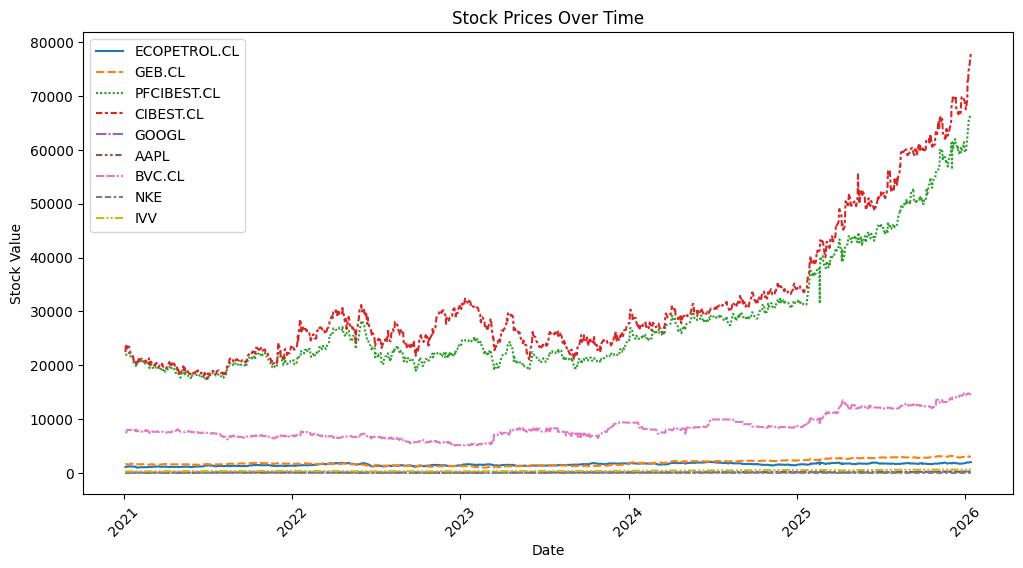

In [16]:
plt.figure(figsize=(12,6))

sns.lineplot(data=stock_prices)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Stock Value')
plt.title('Stock Prices Over Time')



Text(0.5, 1.0, 'Stock Returns Over Time')

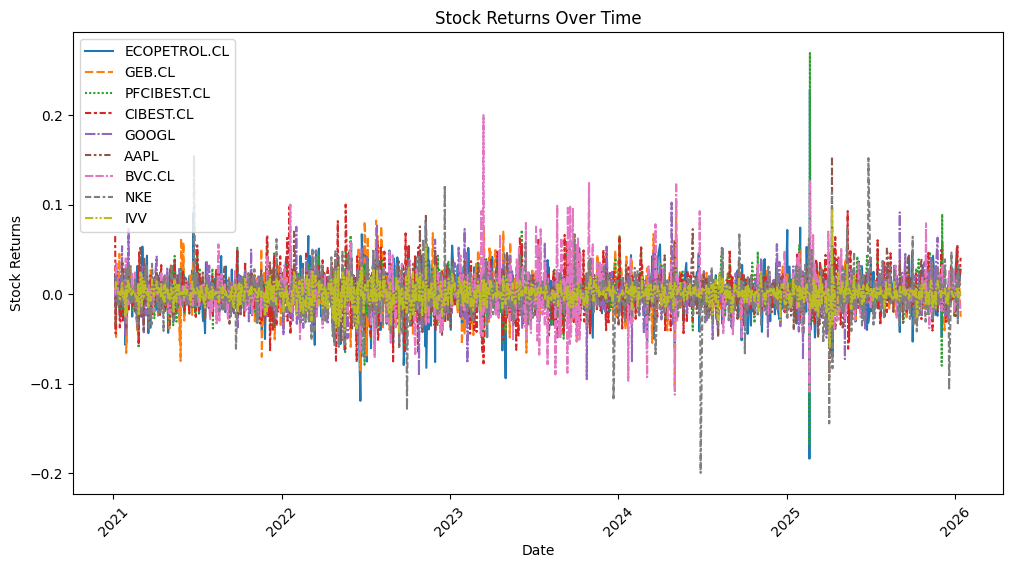

In [17]:
plt.figure(figsize=(12,6))

sns.lineplot(data=stock_returns)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Stock Returns')
plt.title('Stock Returns Over Time')

In [18]:
expected_stock_returns = []
individual_stock_risk = []

for x, y in stock_returns.items():
    expected_stock_returns.append(y.mean())

    individual_stock_risk.append(y.std())

In [19]:
print(f"Mean return (percent)")

for name, value in zip(portfolio, expected_stock_returns):
    print(f"\t{name}: \t{value*100:.2f}%")

Mean return (percent)
	ECOPETROL.CL: 	0.07%
	GEB.CL: 	0.06%
	PFCIBEST.CL: 	0.12%
	CIBEST.CL: 	0.13%
	GOOGL: 	0.11%
	AAPL: 	0.06%
	BVC.CL: 	0.08%
	NKE: 	-0.03%
	IVV: 	0.05%


In [21]:
print(f"Risk (Std. Dev)")

for name, value in zip(portfolio, individual_stock_risk):
    print(f"\t{name}: \t{value}")

Risk (Std. Dev)
	ECOPETROL.CL: 	0.023229889980825553
	GEB.CL: 	0.01916462073188901
	PFCIBEST.CL: 	0.019856447330027498
	CIBEST.CL: 	0.021586022189020167
	GOOGL: 	0.019801960650503936
	AAPL: 	0.017726293215799646
	BVC.CL: 	0.021599058476561676
	NKE: 	0.02217235521991861
	IVV: 	0.010818381201047713
